# Analysis of Census income

### Content
+ Introduction: About Dataset
+ Data dictionary
+ Data preparation
+ Data analysis and visualization
+ Conclusion

## 1.Introduction: About dataset

This data set was extracted from the  US Census Bureau Database. The Census Bureau provides data about people and economy of US. The census records data specific to individual respondents are not available to the public until 72 years after a given census was taken, but aggregate statistical data derived from the census are released as soon as they are available. Every census up to and including 1940 is currently available to the public and can be viewed on microfilm released by the National Archives and Records Administration, the official keeper of archived federal census records.

The current national census has been in progress since 2020; the next census is scheduled for 2030. Since 2013, the Census Bureau began discussions on using technology to aid data collection starting with the 2020 census.For years between the decennial censuses, the Census Bureau issues estimates made using surveys and statistical models, in particular, the Population Estimates Program and American Community Survey.

Source : https://en.wikipedia.org/wiki/United_States_Census#Data_analysis

## 2. Data dictionary

Age - years

Workclass - 8 different categories: (Private, Self-emp-not-inc,   Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)

Education- Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
Years of education - int

Marital Status - Married-civ-spouse,   Divorced, Never-married, Separated, Widowed, Married-spouse-absent,   Married-AF-spouse

OccupationTech-support, Craft-repair,   Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners,   Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv,   Protective-serv, Armed-Forces

Relationship - Wife, Own-child, Husband,   Not-in-family, Other-relative, Unmarried

Race - White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black

Sex - Male, Female

CapitalGain - Amount of capital gained

HoursPerWeek - Number of hours worked per week

Native country - United-States, Cambodia, England, Puerto-Rico, Canada, Germany,   Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras,   Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland,   France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary,   Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador,   Trinadad&Tobago, Peru, Hong, Holand-Netherlands


Income - Either the income is greater than 50,000 or lesser than and equal to 50,000: (>50K, <=50K)



## 3. Data Preparation

In [3]:
dataframe = pd.read_csv("adult.csv")  
dataframe

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:
dataframe.columns = (["age","workclass","FinalWeight","education","educationNum","maritalStatus","occupation","relationship",
                 "race", "sex","capitalGain","capitalLoss","hoursPerWeek","nativeCountry","income"])

In [5]:
dataframe.replace("?", np.nan, inplace = True)
dataframe

,age,workclass,FinalWeight,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [6]:
dataframe.replace("<=50K", 0, inplace = True)
dataframe.replace(">50K", 1, inplace = True)
dataframe


,age,workclass,FinalWeight,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [95]:
print(dataframe.isnull().sum())
dataframe.describe(include='all')

age                 0
workclass        1836
FinalWeight         0
education           0
educationNum        0
maritalStatus       0
occupation       1843
relationship        0
race                0
sex                 0
capitalGain         0
capitalLoss         0
hoursPerWeek        0
nativeCountry     583
income              0
dtype: int64


,age,workclass,FinalWeight,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
count,32561.000000,30725,3.256100e+04,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32561.000000,31978,32561
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


## 3. Data analysis 

In [2]:
import pandas as pd  
import numpy as np
import pandasql as psql
sqldf = lambda q: sqldf(q, globals())
from pandasql import sqldf

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.2.2
0.10.1


### 4.1 Staristics based on workclass

In [7]:
df2 = psql.sqldf("SELECT workclass, count(*) as Numberofrecords, Avg(age) as averageage, Sum(capitalGain) as capitalgain,Sum(capitalLoss) as capitalloss, Avg(hoursPerWeek), sum(income) as above50k FROM dataframe GROUP by workclass")
df2

,workclass,Numberofrecords,averageage,capitalgain,capitalloss,Avg(hoursPerWeek),above50k
0,None,1836,40.960240,1114077,111556,31.919390,191
1,Federal-gov,960,42.590625,799903,107778,41.379167,371
2,Local-gov,2093,41.751075,1842264,229925,40.982800,617
3,Never-worked,7,20.571429,0,0,28.428571,0
4,Private,22696,36.797585,20181687,1815878,40.267096,4963
5,Self-emp-inc,1116,46.017025,5441274,173135,48.818100,622
6,Self-emp-not-inc,2541,44.969697,4792483,296361,44.421881,724
7,State-gov,1298,39.436055,910806,108067,39.031587,353
8,Without-pay,14,47.785714,6830,0,32.714286,0


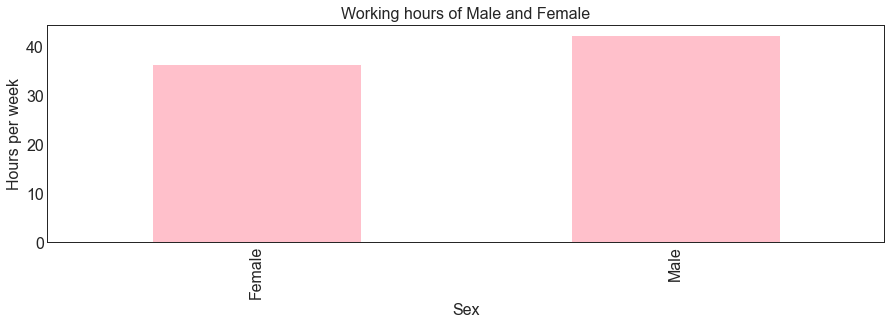

In [10]:

fig = plt.figure(figsize=(15, 4))
dataframe.groupby('sex')['hoursPerWeek'].mean().sort_values().plot(kind='bar', color='pink')
plt.title('Working hours of Male and Female')
plt.xticks(rotation=90)
plt.xlabel("Sex")
plt.ylabel('Hours per week')
plt.show()

### Statistics based on marital status and income levels


### Statistics based on race

In [11]:
df4 = pandasql.sqldf("SELECT race, count(*) as Numberofrecords, Avg(age) as averageage, Sum(capitalGain) as capitalgain,Sum(capitalLoss) as capitalloss, Avg(hoursPerWeek), sum(income) as above50k FROM dataframe GROUP by workclass")
df2

NameError: name 'pandasql' is not defined